In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb
import datetime as dt



In [43]:
df = pd.read_csv('Fire.csv')

df

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,18414.0,09/03/2020,02:12 AM,75227.0,8,A,7.0,DWELLING,1.0,...,261000.0,-15000.0,-2500.0,243500.0,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285
617,617,18459.0,09/19/2020,08:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,...,2240263.0,-2500.0,0.0,2237763.0,0.11,NaN,UNK,5307 GASTON AVE,32.803882,-96.765385
618,618,18496.0,09/24/2020,07:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,...,7357830.0,-200.0,0.0,7357630.0,0.00,YES,UKN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209
619,619,18514.0,09/30/2020,07:15 AM,75253.0,8,B,8.0,SHED,1.0,...,1500.0,-500.0,-100.0,900.0,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056


In [44]:
df[['HOUR', 'AM/PM']] = df['TIME'].str.split(':', expand=True)
df

df[['MINUTE', 'AM/PM']] = df['AM/PM'].str.split(' ', expand=True,)

df_group = df.groupby(["AM/PM", "HOUR"]).mean()

percentage_loss_groupby = df_group.groupby(["PERCENTAGE LOSS"]).count()

percentage_loss_groupby

series = df_group.groupby(["AM/PM", "HOUR"]).mean()["PERCENTAGE LOSS"]

series

AM/PM  HOUR
AM     01      18.638261
       02      11.498387
       03      18.263000
       04       9.511481
       05      26.293571
       06      28.976000
       07       7.424286
       08       9.340800
       09       5.676500
       10      11.146818
       11       9.260455
       12      18.375897
PM     01       7.277273
       02      10.803158
       03      16.320400
       04       4.195200
       05      11.324333
       06       9.019118
       07       6.026129
       08       8.875000
       09       4.880345
       10      14.150769
       11       7.213871
       12      11.923043
Name: PERCENTAGE LOSS, dtype: float64

In [45]:

a = ["A", "B", "C"]

# for item in a:
#     print(item)
    
# for item in range( len(a) ):
#     print(item, a[item])
    
for index, item in enumerate(a):
     print(index, item)

0 A
1 B
2 C


<BarContainer object of 24 artists>

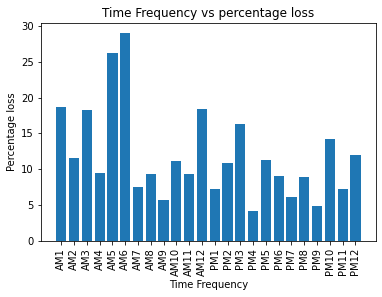

In [50]:
list(series.index)


newl = []
for index, item in enumerate(series.index):
     newl.append(item[0] + str(index % 12 + 1))
        

# for index in range( len(series)):
#      newl.append(series.index[index][0] + str(index+1))

plt.xlabel("Time Frequency")
plt.ylabel("Percentage loss")
plt.title("Time Frequency vs percentage loss")
plt.xticks(rotation=90)
newl
plt.bar(newl, series)

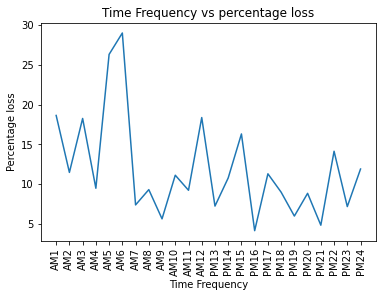

In [47]:
list(series.index)


newl = []
for index, item in enumerate(series.index):
     newl.append(item[0] + str(index + 1))
        

# for index in range( len(series)):
#      newl.append(series.index[index][0] + str(index+1))

plt.xlabel("Time Frequency")
plt.ylabel("Percentage loss")
plt.title("Time Frequency vs percentage loss")
plt.xticks(rotation=90)
newl
plt.plot(newl, series)

In [48]:

# num_list = []
# num_list2 = []

# for num in range(1, 24):
#     #print(num)
#     num_list.append(num)   
#     num_list2.append(num*2)
    
# df = pd.DataFrame()
# df["IDs"] = num_list
# df["IDs x 2"] = num_list2
# df["Ids x 10"] = range(1 * 10, 24 * 10, 10)
# df
# print(num_list)

In [36]:
#[AM1, AM2, ... PM13... PM24]

am_list = []

for row in range(1, 13):
    print(str(row) + "AM")
    am_list.append(str(row) + "AM")
    


for row in range(1, 12):
    print(str(row) + "PM")
    am_list.append(str(row) + "PM")
    
am_list
df["Time"] = am_list
df



plt.xticks(rotation=90)
newl
plt.bar(df, am_list)


1AM
2AM
3AM
4AM
5AM
6AM
7AM
8AM
9AM
10AM
11AM
12AM
1PM
2PM
3PM
4PM
5PM
6PM
7PM
8PM
9PM
10PM
11PM


ValueError: Length of values (23) does not match length of index (621)

In [37]:
show = df.columns
show

Index(['index', 'ID', 'DATE', 'TIME', 'ZIP', 'BATTALION', 'SHIFT',
       'COUNCIL DISTRICT', 'STRUCTURE TYPE', 'BUILDING STORIES',
       'CONSTRUCTION', 'CAUSE', 'TOTAL VALUE', 'STRUCTURE LOSS',
       'CONTENTS LOSS', 'TOTAL SAVED', 'PERCENTAGE LOSS', 'SPRINKER SYSTEM',
       'ALARM SYSTEM', 'ADDRESS', 'Lat', 'Lng', 'HOUR', 'AM/PM', 'MINUTE'],
      dtype='object')

<BarContainer object of 32 artists>

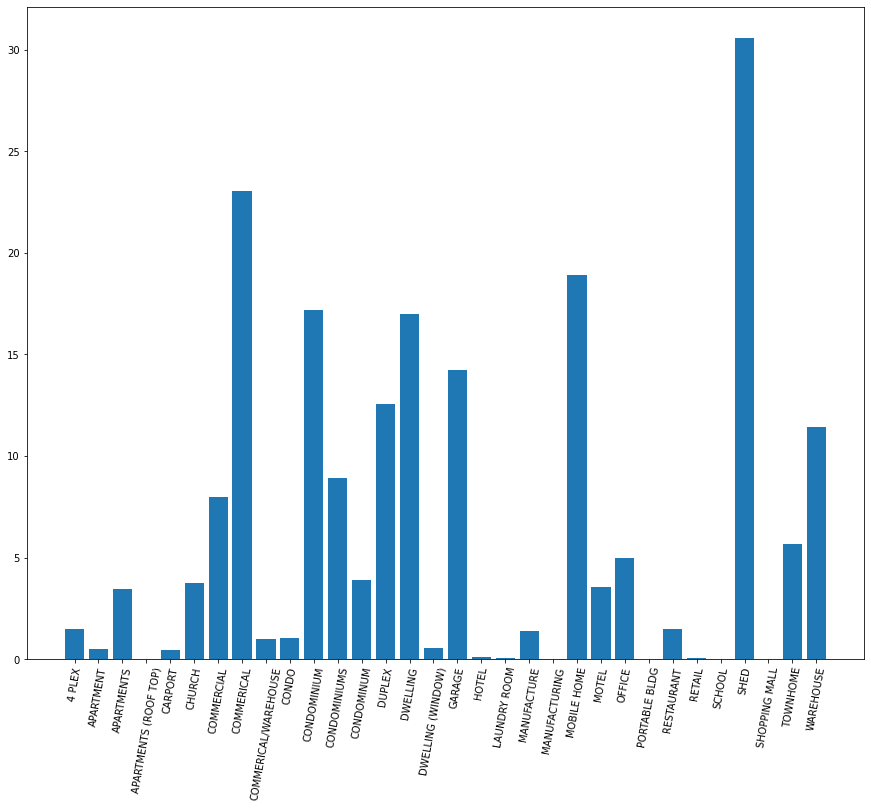

In [38]:
# For structure type v % Loss
gk = df.groupby("STRUCTURE TYPE").mean()
plt.figure(figsize=(15, 12))
plt.xticks(rotation=80)
plt.bar(gk.index, gk["PERCENTAGE LOSS"])
#df.boxplot("PERCENTAGE LOSS")
#plt.boxplot(df["PERCENTAGE LOSS"])

In [39]:
plt.scatter(df_group["AM/PM","HOUR"], df_group["PERCENTAGE LOSS"]) 
plt.ylabel('Percent Loss')
plt.xlabel('LAT')
plt.title('LAT vs. Percent loss')
plt.show()


KeyError: ('AM/PM', 'HOUR')

In [16]:
max(df_group["PERCENTAGE LOSS"])

28.976

In [17]:
frequency_plot = sns.countplot(x="PERCENTAGE LOSS",data=time_percentage_loss_groupby)

NameError: name 'time_percentage_loss_groupby' is not defined

[0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02
 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01
 1.400e-01 1.500e-01 1.600e-01 1.700e-01 1.800e-01 1.900e-01 2.000e-01
 2.100e-01 2.200e-01 2.300e-01 2.400e-01 2.500e-01 2.600e-01 2.700e-01
 2.800e-01 2.900e-01 3.000e-01 3.200e-01 3.300e-01 3.400e-01 3.500e-01
 3.600e-01 3.800e-01 3.900e-01 4.000e-01 4.100e-01 4.200e-01 4.400e-01
 4.600e-01 4.700e-01 4.800e-01 4.900e-01 5.000e-01 5.100e-01 5.200e-01
 5.300e-01 5.400e-01 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01
 6.500e-01 6.700e-01 7.000e-01 7.100e-01 7.400e-01 7.500e-01 7.800e-01
 7.900e-01 8.300e-01 8.400e-01 8.500e-01 8.600e-01 8.900e-01 9.200e-01
 9.700e-01 1.000e+00 1.010e+00 1.020e+00 1.030e+00 1.050e+00 1.070e+00
 1.080e+00 1.090e+00 1.110e+00 1.140e+00 1.170e+00 1.190e+00 1.280e+00
 1.320e+00 1.330e+00 1.400e+00 1.440e+00 1.470e+00 1.480e+00 1.490e+00
 1.500e+00 1.520e+00 1.530e+00 1.560e+00 1.580e+00 1.590e+00 1.620e+00
 1.750

ValueError: shape mismatch: objects cannot be broadcast to a single shape

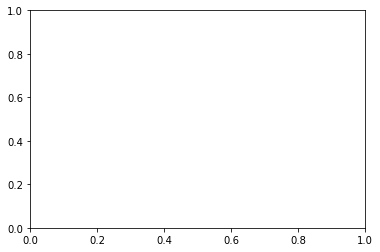

In [14]:

building_story = df['PERCENTAGE LOSS'].unique()
building_story.sort()
print(building_story)

# plot avg. loss by battalion on scatter plot

x_axis=df_group 
y_axis= building_story
plt.bar(x_axis,y_axis,color=['orange'])

plt.xlabel("Building Stories")
plt.ylabel("Average % Value Loss in Fires")
plt.title("Average % Value Loss in Fires by Building_Stories")

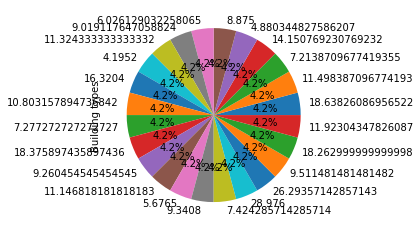

In [15]:
fire_type = df_group['PERCENTAGE LOSS'].value_counts()

fire_type.plot(kind="pie",autopct="%1.1f%%")

plt.xticks(rotation=90)
plt.ylabel("Building types")
plt.show()